In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

In [31]:



#Prepare the data of a single spectrum
data_file="./spectral_Data/spectras/spectrum0.pl"
df = pd.read_csv(data_file,sep="   ",header =2,engine='python')
df=df.dropna(1)
df.rename(columns={'#': 'Energy',' Energy':'g1','Unnamed: 2':'g2','Unnamed: 3':'g3'}, inplace=True)

df.head()

,Energy,g1,g2,g3
0,-1.000,9.046363,8.813323,8.615364
1,-0.998,8.922010,8.712115,8.528425
2,-0.996,8.705244,8.530137,8.370104
3,-0.994,8.411837,8.278020,8.148189
4,-0.992,8.060357,7.969271,7.873003


Minimal height 0.9046363
peaks index: [121 155 194 264 297 336 424 466 493 567 611 647 736 762 801 874 912 941]
peaks intensity [5.20690186 6.88780025 3.5507148  6.73106847 6.52867583 2.03445274
 5.86586448 4.57587849 3.76715204 6.36630283 4.15754817 3.10619177
 5.88775394 4.05543485 5.1347072  7.85833443 2.62504489 4.22528457]
peaks Energys [-0.758 -0.69  -0.612 -0.472 -0.406 -0.328 -0.152 -0.068 -0.014  0.134
  0.222  0.294  0.472  0.524  0.602  0.748  0.824  0.882]


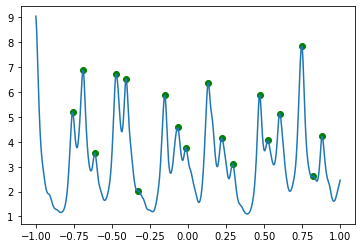

In [32]:
#df['max']=df.iloc[argrelextrema(df.g1.values, np.greater_equal, order=5)[0]]['g1']

#finds all peaks which are higher than 10% of the highest peak
df['max']=df.iloc[find_peaks(df.g1.values,height=df.g1.max()*0.05)[0]   ]['g1'].dropna()

print('Minimal height', df.g1.max()*0.1)
print('peaks index:',find_peaks(df.g1.values,height=df.g1.max()*0.1)[0])
print('peaks intensity',df['max'].dropna().to_numpy())
print('peaks Energys', df['Energy'][df['max'].dropna().index].to_numpy())
test_array_energys=df['Energy'][df['max'].dropna().index].to_numpy()


plt.scatter(df.Energy, df['max'], c='g')
plt.plot(df.Energy, df['g1'])


In [33]:

df_test=pd.DataFrame(zip(df['Energy'][df['max'].dropna().index],df['max'].dropna()), 
                     columns=["Energy","Intensity"])
df_test_array=[df_test,df_test]

In [34]:
result = pd.concat(df_test_array, keys=['file 1', 'file 2'])
result


#figure out how to add more to this

Energy  Intensity
file 1 0   -0.758   5.206902
       1   -0.690   6.887800
       2   -0.612   3.550715
       3   -0.472   6.731068
       4   -0.406   6.528676
       5   -0.328   2.034453
       6   -0.152   5.865864
       7   -0.068   4.575878
       8   -0.014   3.767152
       9    0.134   6.366303
       10   0.222   4.157548
       11   0.294   3.106192
       12   0.472   5.887754
       13   0.524   4.055435
       14   0.602   5.134707
       15   0.748   7.858334
       16   0.824   2.625045
       17   0.882   4.225285
file 2 0   -0.758   5.206902
       1   -0.690   6.887800
       2   -0.612   3.550715
       3   -0.472   6.731068
       4   -0.406   6.528676
       5   -0.328   2.034453
       6   -0.152   5.865864
       7   -0.068   4.575878
       8   -0.014   3.767152
       9    0.134   6.366303
       10   0.222   4.157548
       11   0.294   3.106192
       12   0.472   5.887754
       13   0.524   4.055435
       14   0.602   5.134707
       15   0.748   7.858334
       16   0.824   2.625045
       17   0.882   4.225285

In [243]:
#complete code with list
df_test_list=[]
data_file_list=["spectrum.pl","spectrum.pl","spectrum.pl"]
for data_file in data_file_list:
    df = pd.read_csv(data_file,sep="   ",header =2,engine='python')
    df=df.dropna(1)
    df.rename(columns={'#': 'Energy',' Energy':'g1','Unnamed: 2':'g2','Unnamed: 3':'g3'}, 
              inplace=True)
    df['max']=df.iloc[find_peaks(df.g1.values,height=df.g1.max()*0.1)[0]   ]['g1'].dropna()

    df_test_list.append(pd.DataFrame(zip(df['Energy'][df['max'].dropna().index],
                                         df['max'].dropna()), 
                                         columns=["Energy","Intensity"]))

    
result = pd.concat(df_test_list, keys=["Test1","Test2","Test3"])


Empty DataFrame
Columns: []
Index: [(Test1, 0), (Test1, 1), (Test1, 2), (Test1, 3), (Test2, 0), (Test2, 1), (Test2, 2), (Test2, 3), (Test3, 0), (Test3, 1), (Test3, 2), (Test3, 3)]

In [13]:
import itertools as it
import numpy as np
#a=np.arange(-0.5,0.5,0.1)
a=[-0.5,0,0.5]

final=np.asarray(list((it.product(a,a,a,a,a,a))))
print(len(final))

729


In [52]:
for i in range(5):
    print(final[i])

[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[-0.5 -0.5 -0.5 -0.5 -0.5  0. ]
[-0.5 -0.5 -0.5 -0.5 -0.5  0.5]
[-0.5 -0.5 -0.5 -0.5  0.  -0.5]
[-0.5 -0.5 -0.5 -0.5  0.   0. ]


In [53]:
inputfile = "input/submit.sh"
for i in range(5):
    outname="input/test/submit"+str(i)+".sh"
    with open(outname,'w') as new_file:
        with open(inputfile, 'r') as old_file:
            line = old_file.read()
            new_file.write(line.replace("runxxx", "run"+str(i)).replace("xyz", "-mnd -D {name} -p k6a1 {} -p k6a2 {} -p k11 {} -p k12 {} -p k9a1 {} -p k9a2 {}".format(name="run"+str(i),*final[i])))